In [1]:
import pandas as pd

# Read a csv file

In [2]:
dia = pd.read_csv("diabetes.csv")

In [3]:
dia.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## LableEncoder for string to number


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dia["gender"]) 
dia["gender"]=le.transform(dia["gender"])
#o is for female and 1 is for male


In [6]:
dia["smoking_history"].values

array(['never', 'No Info', 'never', ..., 'former', 'never', 'current'],
      dtype=object)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dia["smoking_history"])
dia["smoking_history"] = le.transform(dia["smoking_history"])
#0-No info 1-current 2-ever 3-former 4-never 

In [8]:
dia.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


# Plot graphs

In [9]:
%matplotlib inline

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

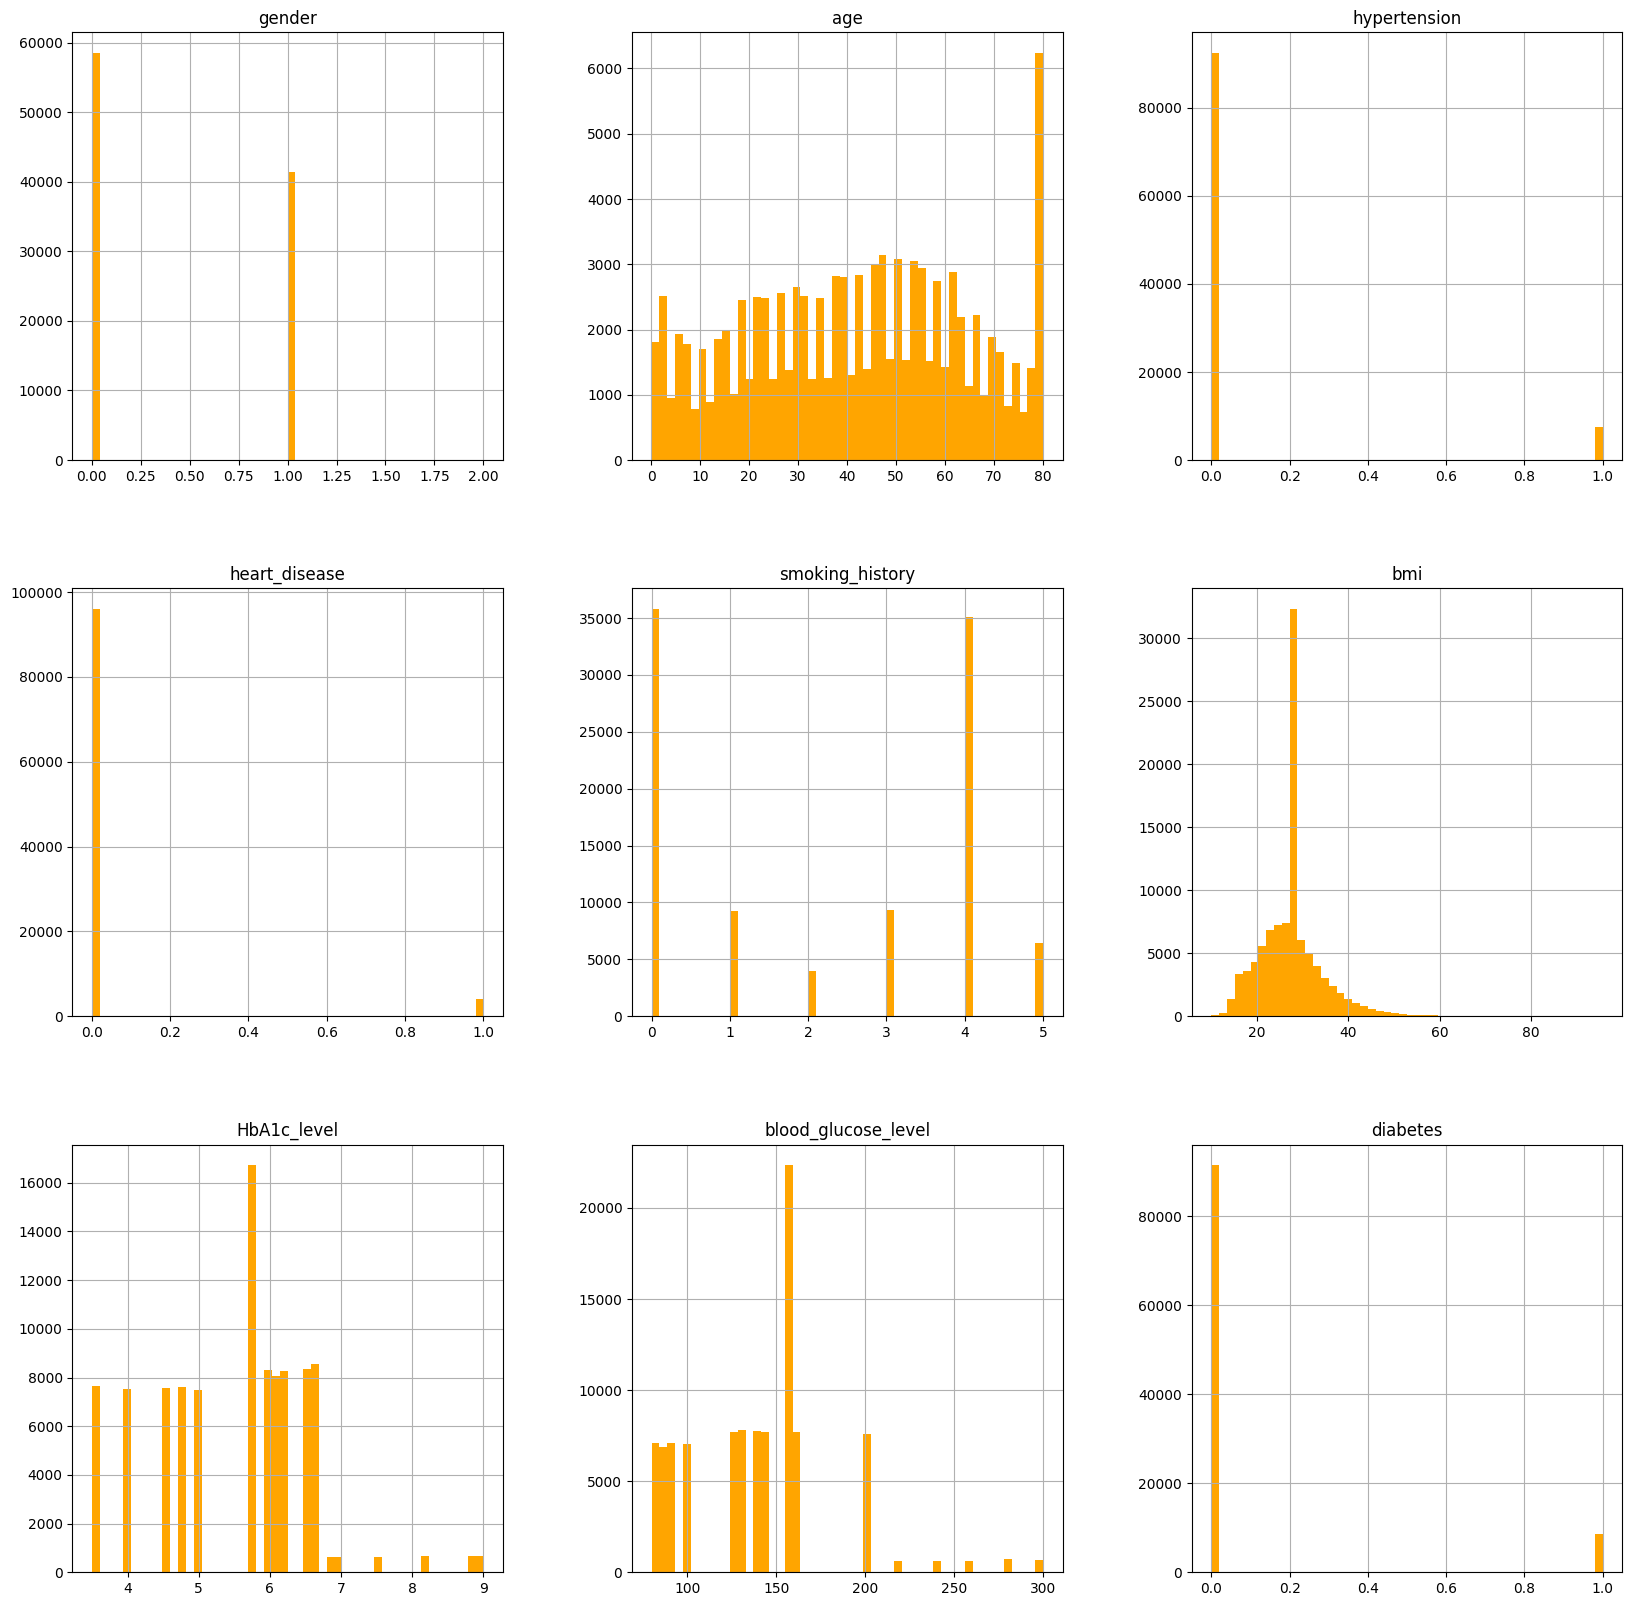

In [10]:
import matplotlib.pyplot as plt
dia.hist(bins= 50 , figsize = (20 ,20) , color= "orange")

# Train-Test splitting

In [11]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 ,test_size= 0.2 ,random_state= 42)
for train , test in split.split(dia , dia[["diabetes","gender"]]):
    train = dia.loc[train]
    test =  dia.loc[test]
    

In [12]:
train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Correlation

In [13]:
corr_matrix = train.corr()
corr_matrix['diabetes']

gender                 0.037400
age                    0.257853
hypertension           0.195157
heart_disease          0.170160
smoking_history        0.092660
bmi                    0.213832
HbA1c_level            0.401216
blood_glucose_level    0.419628
diabetes               1.000000
Name: diabetes, dtype: float64

In [14]:
train['himoglobin& glucose'] = train["HbA1c_level"]*train["blood_glucose_level"]

In [15]:
corr_matrix = train.corr()
corr_matrix['diabetes'].sort_values()

gender                 0.037400
smoking_history        0.092660
heart_disease          0.170160
hypertension           0.195157
bmi                    0.213832
age                    0.257853
HbA1c_level            0.401216
blood_glucose_level    0.419628
himoglobin& glucose    0.565449
diabetes               1.000000
Name: diabetes, dtype: float64

# Graph

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='HbA1c_level', ylabel='age'>,
        <Axes: xlabel='blood_glucose_level', ylabel='age'>,
        <Axes: xlabel='himoglobin& glucose', ylabel='age'>,
        <Axes: xlabel='diabetes', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='HbA1c_level'>,
        <Axes: xlabel='HbA1c_level', ylabel='HbA1c_level'>,
        <Axes: xlabel='blood_glucose_level', ylabel='HbA1c_level'>,
        <Axes: xlabel='himoglobin& glucose', ylabel='HbA1c_level'>,
        <Axes: xlabel='diabetes', ylabel='HbA1c_level'>],
       [<Axes: xlabel='age', ylabel='blood_glucose_level'>,
        <Axes: xlabel='HbA1c_level', ylabel='blood_glucose_level'>,
        <Axes: xlabel='blood_glucose_level', ylabel='blood_glucose_level'>,
        <Axes: xlabel='himoglobin& glucose', ylabel='blood_glucose_level'>,
        <Axes: xlabel='diabetes', ylabel='blood_glucose_level'>],
       [<Axes: xlabel='age', ylabel='himoglobin& glucose'>,
        <Axes: xlabel=

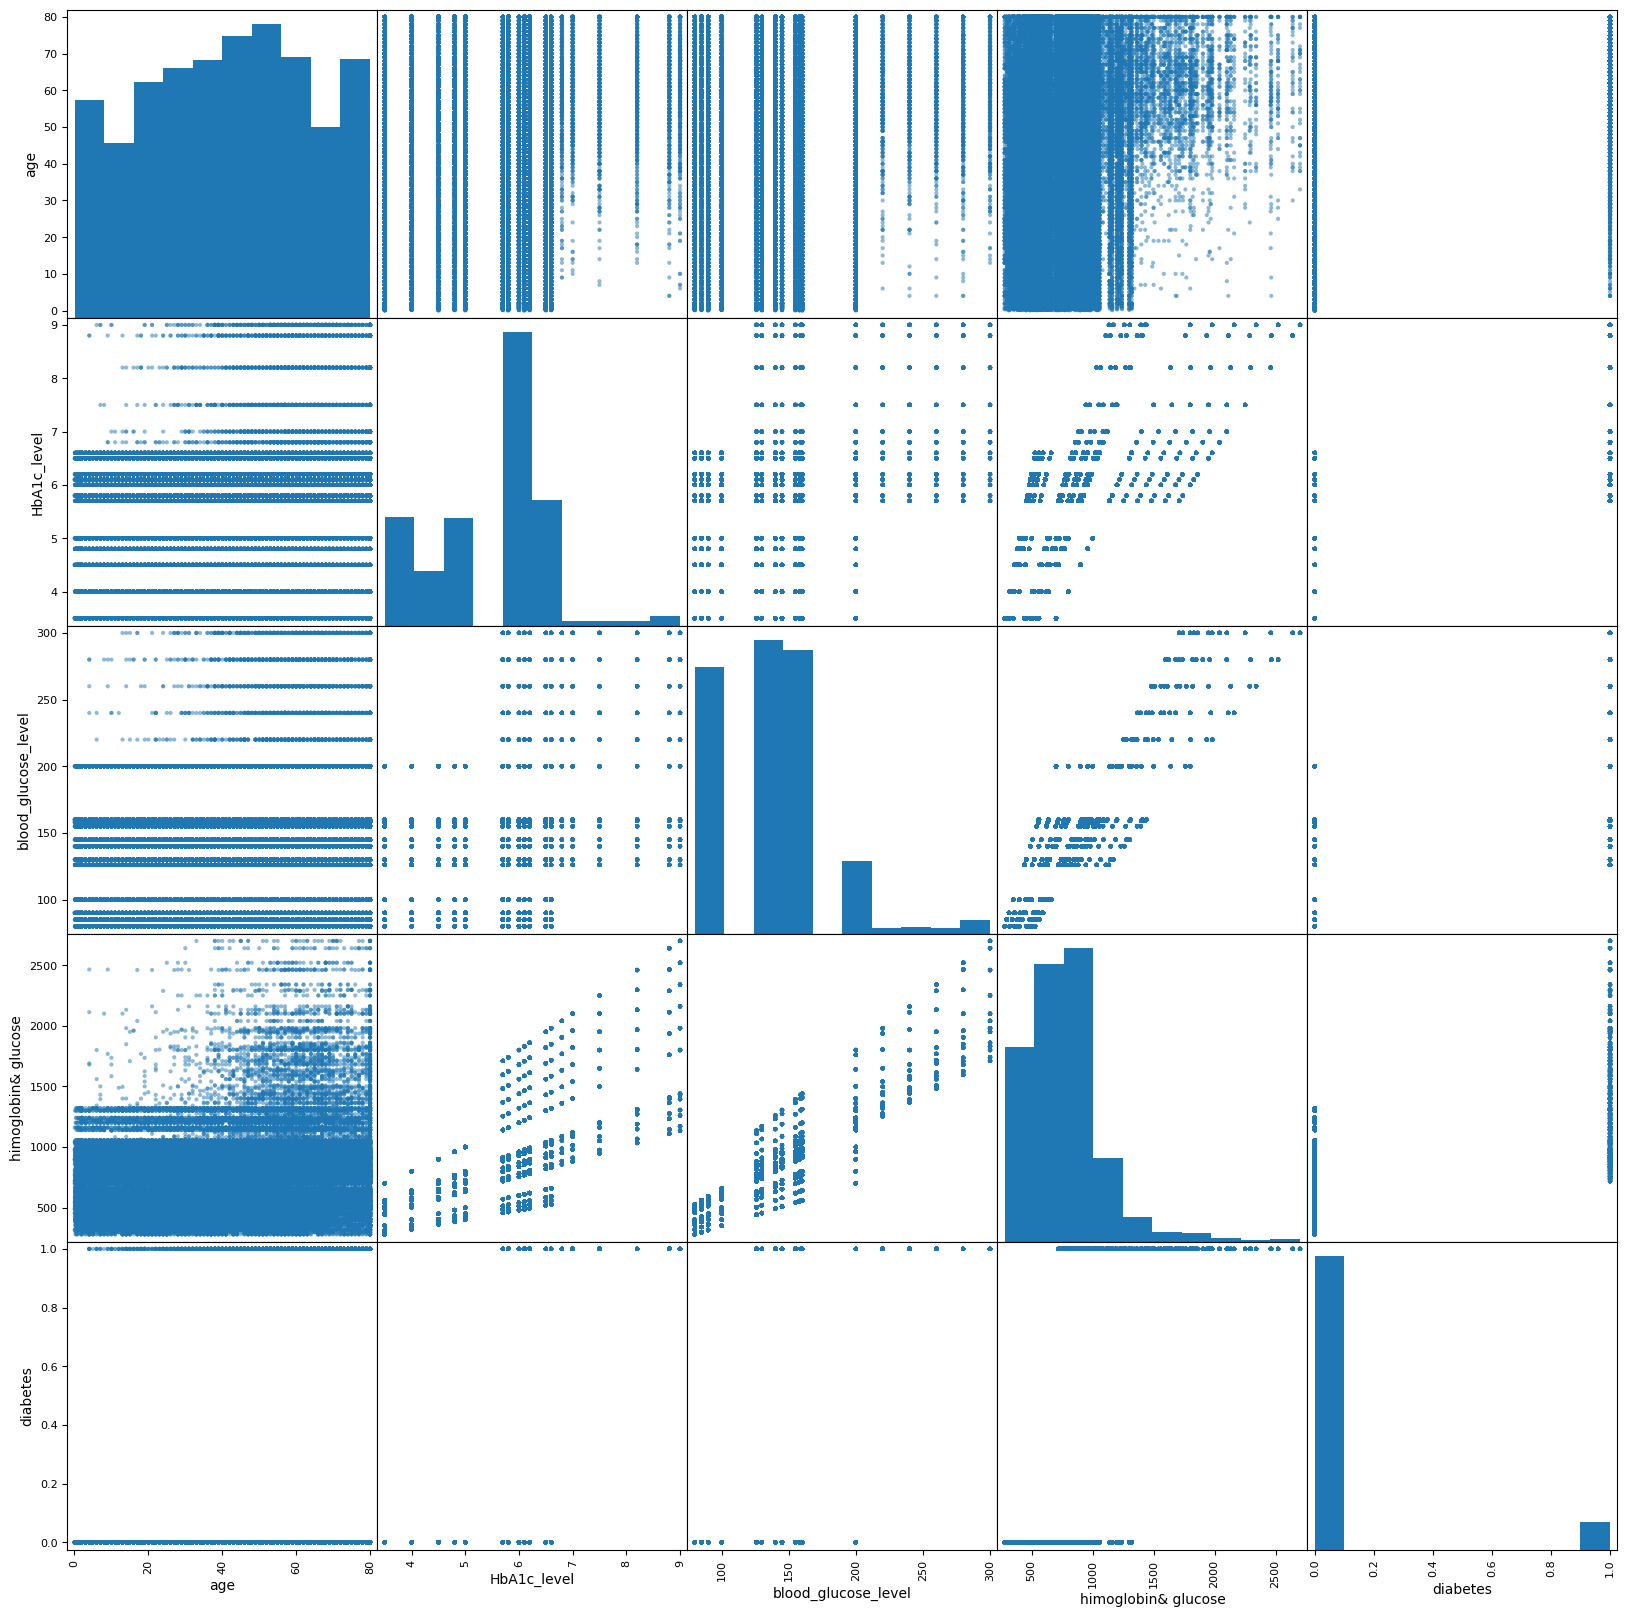

In [16]:
from pandas.plotting import scatter_matrix
attr = ["age" ,"HbA1c_level" ,"blood_glucose_level", "himoglobin& glucose", "diabetes"]
scatter_matrix(train[attr] , figsize=(20,20))

<Axes: xlabel='HbA1c_level', ylabel='diabetes'>

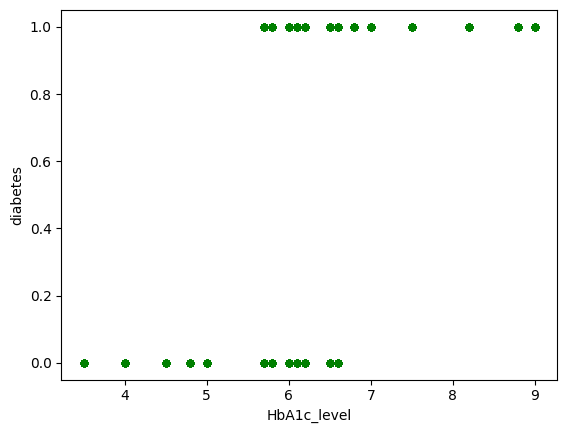

In [17]:
 train.plot(kind="scatter" ,x= "HbA1c_level" ,y ="diabetes" ,alpha= 0.8,color="green")

In [18]:
train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,himoglobin& glucose
17538,1,10.0,0,0,0,21.79,4.0,80,0,320.0
12265,0,9.0,0,0,4,17.63,6.6,100,0,660.0
1225,0,27.0,0,0,4,23.37,4.8,130,0,624.0
38209,0,43.0,0,0,0,25.39,6.2,145,0,899.0
84864,0,80.0,0,0,4,43.77,4.8,155,0,744.0


In [19]:
x_train = train.iloc[: , :-2]
y_train = train.iloc[: , -2]

In [20]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(tol=0.1, solver= "lbfgs")
# clf.fit(x_train , y_train)

In [21]:
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# clf.fit(x_train , y_train)

In [22]:
# from sklearn.linear_model import SGDClassifier
# clf= SGDClassifier()
# clf.fit(x_train , y_train)

In [23]:
# from sklearn.neighbors import KNeighborsClassifier
# clf = KNeighborsClassifier()
# clf.fit(x_train , y_train)

In [24]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf.fit(x_train , y_train)


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train , y_train)


RandomForestClassifier()

In [26]:
# from sklearn.svm import SVC
# clf = SVC()
# clf.fit(x_train , y_train)


# Confusing Metrix

               precision    recall  f1-score   support

Non-Diabetic        1.00      1.00      1.00     73200
     Diabetic       1.00      0.99      1.00      6800

     accuracy                           1.00     80000
    macro avg       1.00      1.00      1.00     80000
 weighted avg       1.00      1.00      1.00     80000



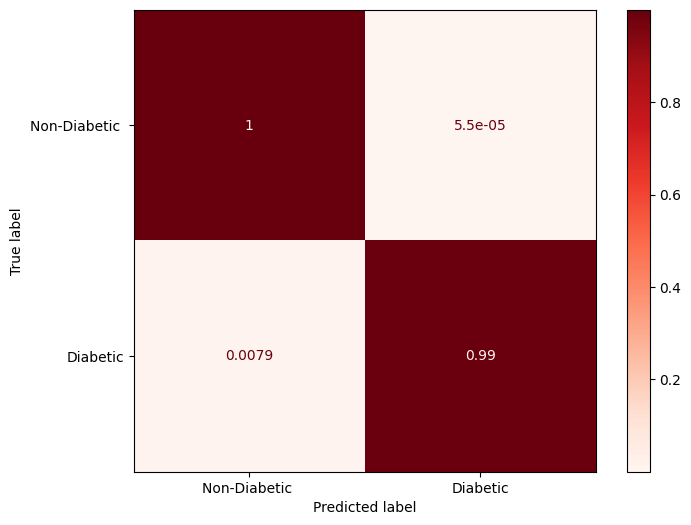

In [27]:
y_train_pre= clf.predict(x_train)
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,classification_report
target_names =["Non-Diabetic " ,"Diabetic"]
print(classification_report(y_train, y_train_pre.reshape(-1,1), target_names=target_names))
cm = confusion_matrix(y_train, y_train_pre.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Reds')

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , x_train , y_train,cv = 10 , scoring = "accuracy")

array([0.968375, 0.9695  , 0.971   , 0.97075 , 0.967375, 0.96925 ,
       0.97    , 0.972   , 0.97125 , 0.971125])

# Precision Recall

In [29]:
from sklearn.metrics import precision_recall_curve
precision , recall , threshold = precision_recall_curve(y_train , y_train_pre)


In [30]:
precision

array([0.085     , 0.99940741, 1.        ])

In [31]:
recall

array([1.        , 0.99205882, 0.        ])

In [32]:
threshold

array([0, 1], dtype=int64)

# Plot the curve 

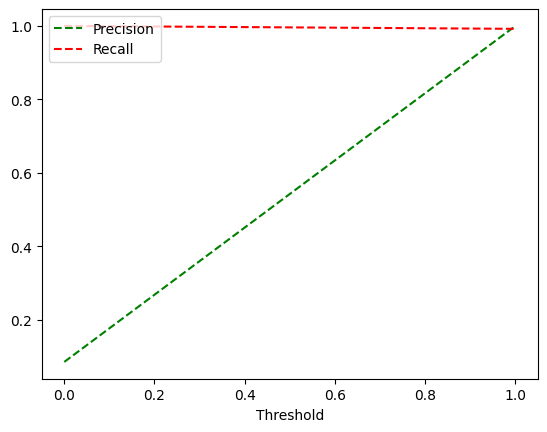

In [33]:
plt.plot(threshold , precision[:-1] , "g--" , label = "Precision")
plt.plot(threshold, recall[:-1] , "r--" , label = "Recall")
plt.xlabel("Threshold")
plt.legend(loc = "upper left")
plt.show()

In [34]:
x_test = test.iloc[: , :-1]
y_test = test.iloc[: ,-1]

In [35]:
y_predict =clf.predict(x_test)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , x_test , y_test,cv = 10 , scoring = "accuracy")

array([0.9685, 0.968 , 0.974 , 0.9715, 0.963 , 0.968 , 0.9725, 0.973 ,
       0.9705, 0.971 ])

In [36]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
val = confusion_matrix(y_test , y_predict)

dis =  ConfusionMatrixDisplay(confusion_matrix= val , display_labels=["diabatic" , "Non-diabatic"])

In [38]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(clf , x_test , y_test , cv= 10)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)